# Logarithmic Binning (Log Binning) Explained

Logarithmic binning is a method used in data analysis to group data into bins whose widths increase exponentially. This is particularly useful when dealing with data that spans several orders of magnitude, such as:

- Power-law distributed data
- Frequency distributions in networks
- Scientific data (e.g., earthquake magnitudes, financial returns)
- Histogram representation of skewed datasets

---

**How It Works**
1. **Define the Bin Edges**  
   Instead of using linearly spaced bins, the bin edges are spaced logarithmically:
   $$
   b_i = b_{\text{min}} \times r^i
   $$
   where:
   - $b_i$ is the bin edge
   - $b_{\text{min}}$ is the smallest bin edge
   - $r$ is the ratio between consecutive bin edges, commonly $r = 2$ or $r = 10^{1/n}$.
   - $i$ is the bin index

2. **Count the Data in Each Bin**  
   - Data points falling within each bin range are counted.
   - Since bins grow exponentially, fewer points are found in higher bins.

3. **Normalize for Proper Visualization**  
   - If plotting a histogram, normalize by dividing the count in each bin by the bin width to maintain comparable densities.

---

**Why Use Log Binning?**
- **Avoids Oversampling Small Values**: Linear binning can cluster too many points in the lower range.
- **Maintains Resolution in Large Values**: Exponential bin growth prevents large values from being underrepresented.
- **Better for Power-Law Distributions**: Many real-world phenomena follow power-law distributions, where log binning provides clearer insights.

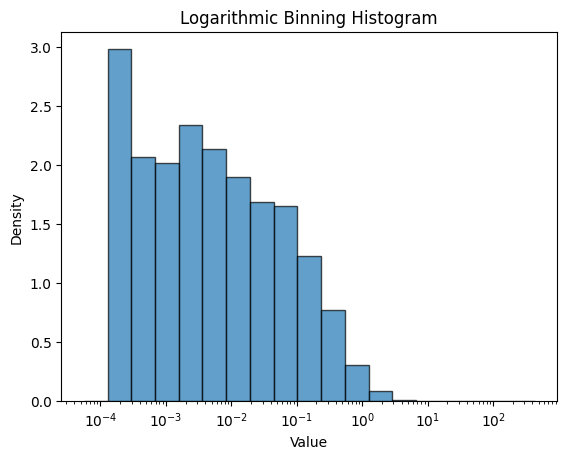

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate power-law distributed data
data = np.random.pareto(2, 10000)

# Define log-spaced bins
bins = np.logspace(np.log10(min(data)), np.log10(max(data)), 20)

# Plot histogram
plt.hist(data, bins=bins, density=True, alpha=0.7, edgecolor="black")

# Log scale for x-axis
plt.xscale("log")
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Logarithmic Binning Histogram")
plt.show()

# **Explanation of `numpy.logspace`**

The function `numpy.logspace` is used to generate numbers that are spaced evenly on a **logarithmic scale**. This is useful for creating bins or sequences that span multiple orders of magnitude.

 **Parameters:**
- **`start`**: The starting exponent of the sequence (in log scale).
- **`stop`**: The ending exponent of the sequence (in log scale).
- **`num`**: Number of values to generate (default is 50).
- **`endpoint`**: If `True`, includes the stop value in the sequence.
- **`base`**: The base of the logarithm (default is 10).
- **`dtype`**: Data type of the output array (optional).

**How It Works**
`numpy.logspace(start, stop, num, base)` generates `num` points between:
$$
\text{base}^{\text{start}} \quad \text{to} \quad \text{base}^{\text{stop}}
$$

For example, if `base=10`, `start=1`, and `stop=3`, it generates values from:
$$
10^1 = 10 \quad \text{to} \quad 10^3 = 1000
$$
with logarithmic spacing. 

**Why Use `logspace`?**
- It **avoids dense clustering** of points at smaller values.
- It is **useful for power-law distributions**.
- It is commonly used in **histograms, frequency analysis, and scientific computations**.

In [2]:
binn = np.logspace(start=0, stop=2, num=5, endpoint=True, base=10, dtype=None)
binn

array([  1.        ,   3.16227766,  10.        ,  31.6227766 ,
       100.        ])

The numbers are **logarithmically spaced**, meaning the ratio between successive elements is approximately constant.

In [3]:
for i in range(len(binn)-1):
    print(f"binn[{i+1}]/binn[{i}] =",binn[i+1]/binn[i])

binn[1]/binn[0] = 3.1622776601683795
binn[2]/binn[1] = 3.162277660168379
binn[3]/binn[2] = 3.162277660168379
binn[4]/binn[3] = 3.1622776601683795


# Formal explanation

Logarithmic binning spaces bins exponentially rather than linearly. The **bin edges** are computed as

$$
b_i = b_{\text{min}} \times r^i
$$

where:
- $b_i$ is the $ i^{th} $ bin edge,
- $b_{\text{min}}$ is the minimum value of the data range,
- $r$ is the ratio between consecutive bin edges,
- $i$ is the bin index.

 **Step-by-Step Calculation**
1. **Determine the Minimum and Maximum Values**  

   - $ b_{\text{min}} = \min(\text{data}) $
   - $ b_{\text{max}} = \max(\text{data}) $

2. **Compute the Ratio $ r $**  
   The ratio is computed as:
   
   $$
   r = \left( \frac{b_{\text{max}}}{b_{\text{min}}} \right)^{\frac{1}{(N-1)}}
   $$
   
   where $ N $ is the number of bins.

3. **Compute Each Bin Edge**  
   Using:
   
   $$
   b_i = b_{\text{min}} \times r^i, \quad i = 0, 1, 2, ..., (N-1)
   $$
   
   You generate the **logarithmically spaced bin edges**.

---

**Alternative Formula Using Logarithms**
Instead of computing the ratio manually, you can use logarithms. Just note that

$$
y = a^x \Rightarrow \text{log}_a(y) = x \Rightarrow y = a^{\text{log}_a(x)}
$$

With this logarithm property in mind, just take the log (here we assume base = 10) of $b_i$, then

$$
b_i = 10^{\left[ \log_{10}(b_{\text{min}}) + i  \frac{\log_{10}(b_{\text{max}}) - \log_{10}(b_{\text{min}})}{(N-1)} \right]}
$$
This ensures equal spacing in the logarithmic domain.

---

**Example Calculation**
For example, if:
- $b_{\text{min}} = 1$
- $b_{\text{max}} = 1000$
- $N = 5$ bins

We calculate the 
1. **Ratio $ r $**:
   $$
   r = \left( \frac{1000}{1} \right)^{\frac{1}{4}} = 10^{\frac{3}{4}} \approx 5.62
   $$
2. **Bin Edges**:
   - $ b_0 = 1 $
   - $ b_1 = 1 \times 5.62 = 5.62 $
   - $ b_2 = 1 \times 5.62^2 = 31.62 $
   - $ b_3 = 1 \times 5.62^3 = 177.83 $
   - $ b_4 = 1000 $

Which results in bins: **[1, 5.62, 31.62, 177.83, 1000]**. 

on the script bellow, you can check the two presented methods in the same dataset, first by using the logspace function, and the second method by the explicit calculation.

In [4]:
binn = np.logspace(start=0, stop=3, num=5, endpoint=True, base=10, dtype=None)
print("bins =",binn)
print()
for i in range(len(binn)-1):
    print(f"binn[{i+1}]/binn[{i}] =",binn[i+1]/binn[i])

bins = [   1.            5.62341325   31.6227766   177.827941   1000.        ]

binn[1]/binn[0] = 5.623413251903491
binn[2]/binn[1] = 5.62341325190349
binn[3]/binn[2] = 5.623413251903491
binn[4]/binn[3] = 5.623413251903491


# Analyzing Pareto-Distributed Data Using Binning and Cumulative Sums

The Pareto distribution, often referred to as the **80/20 rule**, describes many real-world phenomena where a small percentage of observations contribute to a large portion of the total value. It is commonly used in economics, finance, and natural sciences. The probability density function (PDF) of a Pareto-distributed variable \( X \) is given by:

$$
 f(x) = \frac{\alpha x_m^{\alpha}}{x^{\alpha+1}}, \quad x \geq x_m, \alpha > 0
$$

where:
- $\alpha$ (shape parameter) controls the heaviness of the tail,
- $x_m$ (scale parameter) is the minimum possible value of $X$.

We analyze a dataset generated from a Pareto distribution, apply binning, compute cumulative sums, and visualize relationships using log-log plots. We generate **1 million observations** following a Pareto distribution with shape parameter $\alpha = 2.0$ and a minimum value scaled to 100. We then bin the values into **100 bins** using equal-width binning. 

We plotted the **Binned Value vs. Cumulative Count Sum**. This plot helps visualize how the cumulative count increases across binned values. The rapid rise in cumulative counts for lower bin values confirms the Pareto principle, as most observations fall in the lower range. This plot visualizes power-law relationships by transforming both axes into a logarithmic scale. The linear trend in the log-log plot suggests a power-law behavior, a signature of heavy-tailed distributions.

**Key Observations:**
- The distribution is highly skewed, with most values concentrated in the lower bins.
- The cumulative count sum grows rapidly for smaller values, indicating a large proportion of small contributors.
- The log-log plot suggests a power-law decay, characteristic of Pareto-distributed data.

**Applications**
Understanding the behavior of Pareto-distributed data is crucial in various fields:
- **Economics & Wealth Distribution**: A small percentage of individuals hold most of the wealth.
- **Business & Sales**: A few products or customers drive most of the revenue.
- **Network Traffic & Cybersecurity**: A small subset of users generate most web traffic.
- **Natural Phenomena**: City populations, earthquake magnitudes, and word frequencies follow similar distributions.

By binning and analyzing Pareto-distributed data, we gain insights into real-world power-law behaviors. The log-log plots confirm that the cumulative sum follows a predictable heavy-tailed pattern. These techniques can be extended to model and predict trends in financial markets, network behaviors, and beyond.

In [5]:
import numpy as np
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)

# Generate a dataset with a Pareto distribution 
size = 100000
shape = 2.5  # Pareto shape parameter
scale = 100
pareto_values = (np.random.pareto(a=shape, size=size) + 1) * scale

# Create a DataFrame with a unique ID and the Pareto-distributed values
df = pd.DataFrame({
    "id": range(1, size + 1),
    "Value": pareto_values
})

# Sort by value in ascending order
df = df.sort_values(by="Value").reset_index(drop=True)

# Defining N of bins
num_bins = 25
b_min = df["Value"].min()
b_max = df["Value"].max()

# Log Binning Formula: log-spaced bins
logspace_bins = np.logspace(np.log10(b_min), np.log10(b_max), num_bins)
df["BinLogspace"] = np.digitize(df["Value"], logspace_bins)

# Log Binning Formula: lin-spaced bins
linspace_bins = np.linspace(df['Value'].min(), df['Value'].max(), num_bins)  
labels = range(1, num_bins)
df['BinLinspace'] = pd.cut(df['Value'], bins=linspace_bins, labels=labels, include_lowest=True)

# Explicit Binning Formula: bi = bmin * r^i
r = (b_max / b_min) ** (1 / num_bins)
explicit_bins = [b_min * (r ** i) for i in range(num_bins)]
df["BinFormula"] = np.digitize(df["Value"], explicit_bins)

# Other Binning logic
growth = (b_max / b_min) ** (1 / num_bins)  
bounded_bins = [b_min]  
for _ in range(num_bins - 1):
    next_bin = growth * bounded_bins[-1]
    bounded_bins.append(next_bin)
df["BinMethod"] = np.digitize(df["Value"], bounded_bins)

# Calculate cumulative count of ID
df['Cumulative_Count'] = df.index + 1
df['CumulativePercentage'] = (df['Cumulative_Count'] / size) * 100

In [6]:
df

,id,Value,BinLogspace,BinLinspace,BinFormula,BinMethod,Cumulative_Count,CumulativePercentage
0,33727,100.000221,0,1,1,1,1,0.001
1,56344,100.000337,1,1,1,1,2,0.002
2,2903,100.000465,1,1,1,1,3,0.003
3,42632,100.000669,1,1,1,1,4,0.004
4,97532,100.001174,1,1,1,1,5,0.005
...,...,...,...,...,...,...,...,...
99995,58233,4873.732442,20,11,21,21,99996,99.996
99996,46863,5577.356019,21,13,22,22,99997,99.997
99997,43677,6638.248461,22,15,23,23,99998,99.998
99998,96708,7042.537638,22,16,23,23,99999,99.999


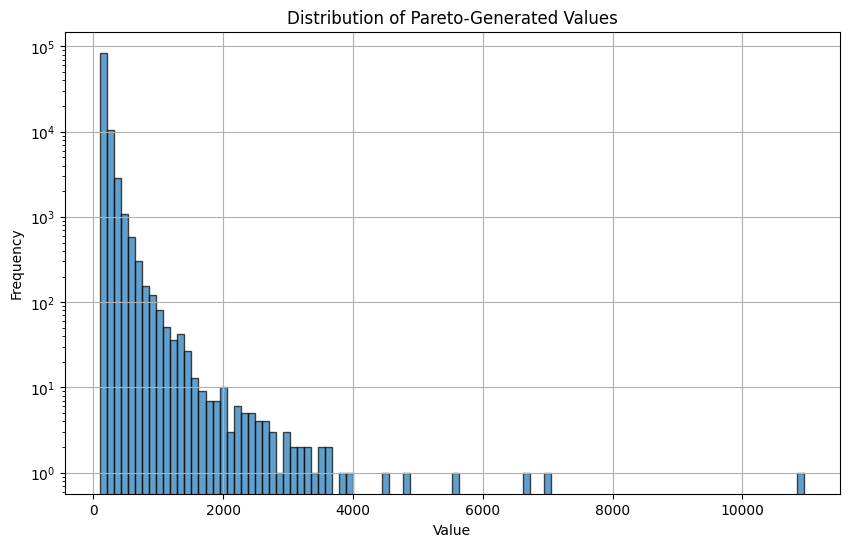

In [7]:
# Plot the distribution of the "value" column
plt.figure(figsize=(10, 6))
plt.hist(df["Value"], bins=100, edgecolor="black", alpha=0.7)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution of Pareto-Generated Values")
plt.yscale("log")  # Log scale to better visualize distribution
plt.grid(True)
plt.show()


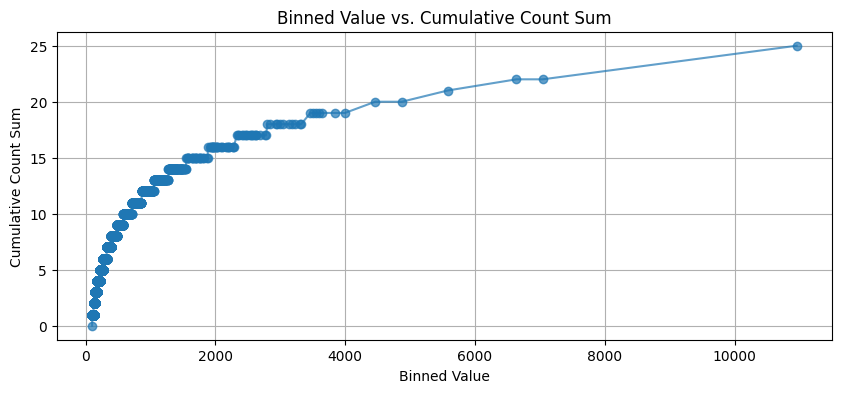

In [8]:
# Plot the graph of Binned Value vs. Cumulative Count Sum
plt.figure(figsize=(10, 4))
plt.plot(df['Value'], df['BinLogspace'], marker='o', linestyle='-', alpha=0.7)
plt.xlabel('Binned Value')
plt.ylabel('Cumulative Count Sum')
plt.title('Binned Value vs. Cumulative Count Sum')
plt.grid(True)
plt.show()

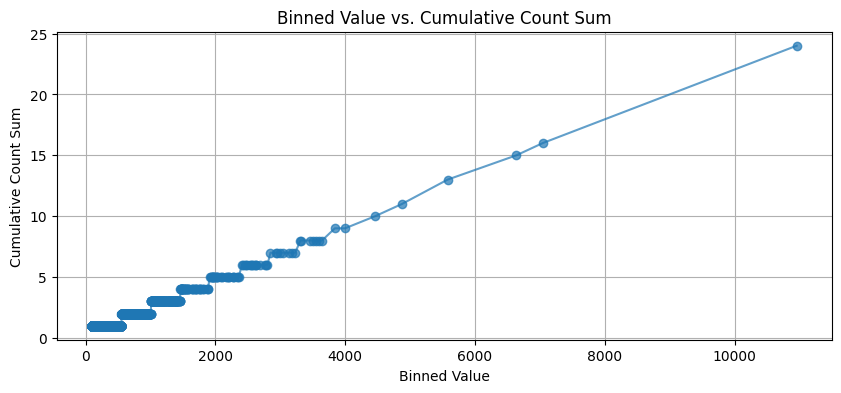

In [9]:
# Plot the graph of Binned Value vs. Cumulative Count Sum
plt.figure(figsize=(10, 4))
plt.plot(df['Value'], df['BinLinspace'], marker='o', linestyle='-', alpha=0.7)
plt.xlabel('Binned Value')
plt.ylabel('Cumulative Count Sum')
plt.title('Binned Value vs. Cumulative Count Sum')
plt.grid(True)
plt.show()

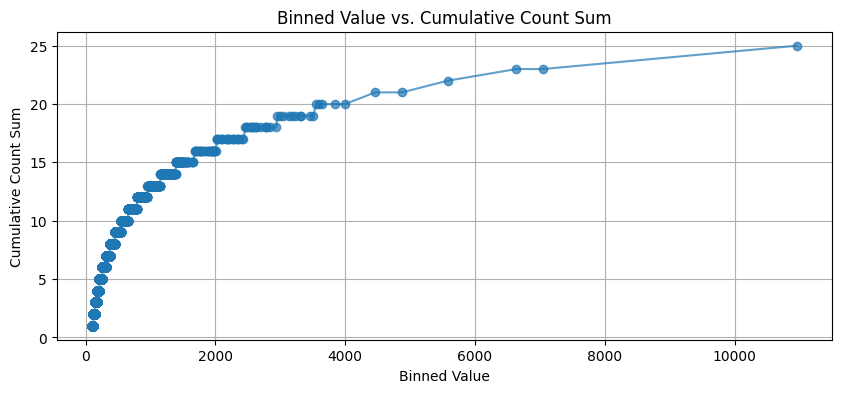

In [10]:
# Plot the graph of Binned Value vs. Cumulative Count Sum
plt.figure(figsize=(10, 4))
plt.plot(df['Value'], df['BinFormula'], marker='o', linestyle='-', alpha=0.7)
plt.xlabel('Binned Value')
plt.ylabel('Cumulative Count Sum')
plt.title('Binned Value vs. Cumulative Count Sum')
plt.grid(True)
plt.show()

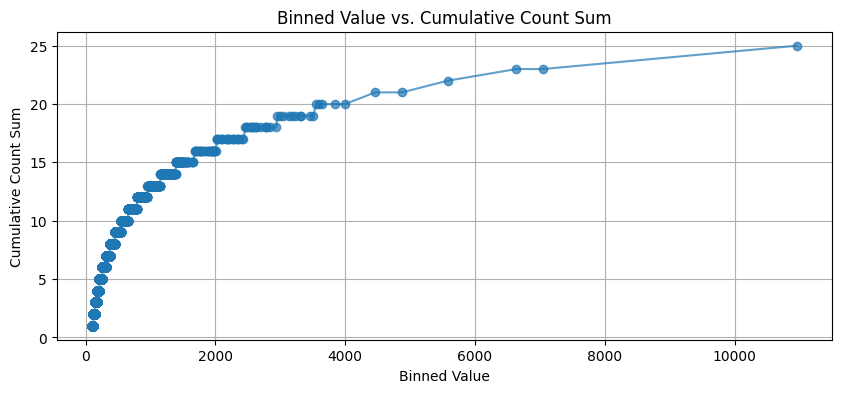

In [11]:
# Plot the graph of Binned Value vs. Cumulative Count Sum
plt.figure(figsize=(10, 4))
plt.plot(df['Value'], df['BinMethod'], marker='o', linestyle='-', alpha=0.7)
plt.xlabel('Binned Value')
plt.ylabel('Cumulative Count Sum')
plt.title('Binned Value vs. Cumulative Count Sum')
plt.grid(True)
plt.show()

## Distribution of bins vs cumulative counts

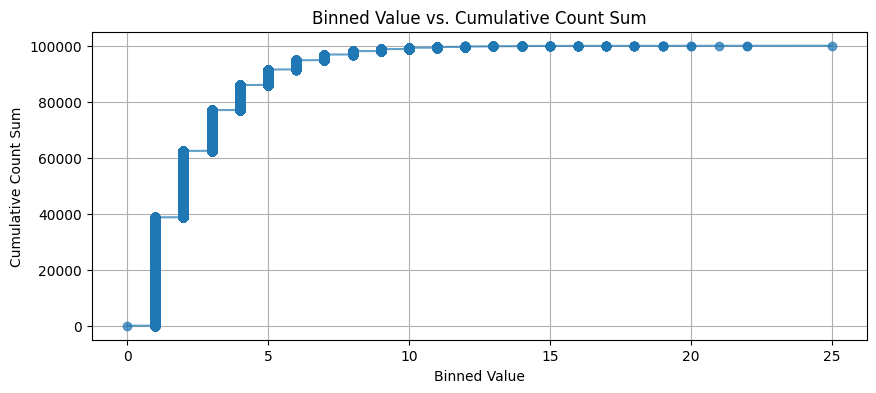

In [12]:
# Plot the graph of Binned Value vs. Cumulative Count Sum
plt.figure(figsize=(10, 4))
plt.plot(df['BinLogspace'], df['Cumulative_Count'], marker='o', linestyle='-', alpha=0.7)
plt.xlabel('Binned Value')
plt.ylabel('Cumulative Count Sum')
plt.title('Binned Value vs. Cumulative Count Sum')
plt.grid(True)
plt.show()

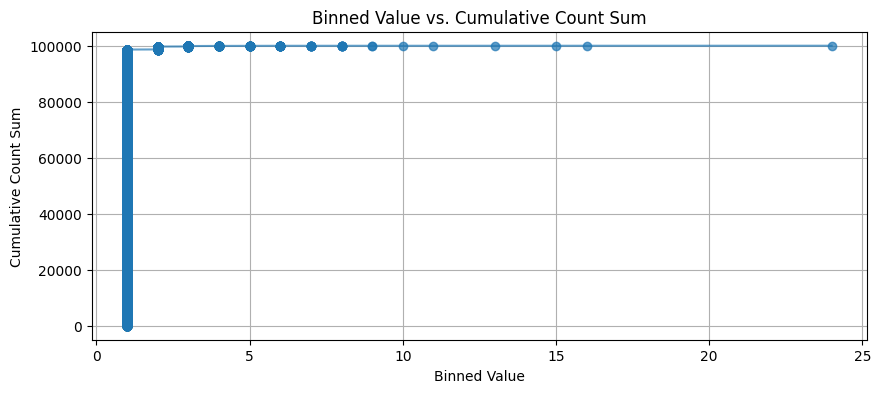

In [13]:
# Plot the graph of Binned Value vs. Cumulative Count Sum
plt.figure(figsize=(10, 4))
plt.plot(df['BinLinspace'], df['Cumulative_Count'], marker='o', linestyle='-', alpha=0.7)
plt.xlabel('Binned Value')
plt.ylabel('Cumulative Count Sum')
plt.title('Binned Value vs. Cumulative Count Sum')
plt.grid(True)
plt.show()

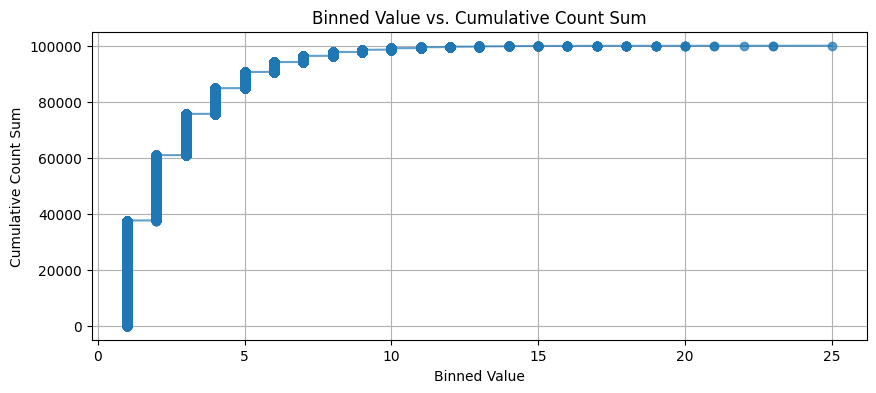

In [14]:
# Plot the graph of Binned Value vs. Cumulative Count Sum
plt.figure(figsize=(10, 4))
plt.plot(df['BinFormula'], df['Cumulative_Count'], marker='o', linestyle='-', alpha=0.7)
plt.xlabel('Binned Value')
plt.ylabel('Cumulative Count Sum')
plt.title('Binned Value vs. Cumulative Count Sum')
plt.grid(True)
plt.show()

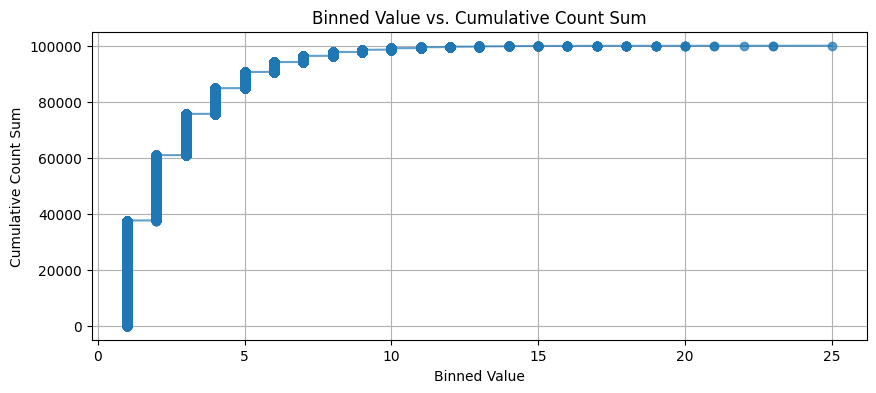

In [15]:
# Plot the graph of Binned Value vs. Cumulative Count Sum
plt.figure(figsize=(10, 4))
plt.plot(df['BinMethod'], df['Cumulative_Count'], marker='o', linestyle='-', alpha=0.7)
plt.xlabel('Binned Value')
plt.ylabel('Cumulative Count Sum')
plt.title('Binned Value vs. Cumulative Count Sum')
plt.grid(True)
plt.show()

# Checking for growth ratio

In [16]:
for i in range(10):
    print(f"logspace_bins[{i+1}]/logspace_bins[{i}] =",logspace_bins[i+1]/logspace_bins[i])

logspace_bins[1]/logspace_bins[0] = 1.2161491387359578
logspace_bins[2]/logspace_bins[1] = 1.2161491387359564
logspace_bins[3]/logspace_bins[2] = 1.2161491387359566
logspace_bins[4]/logspace_bins[3] = 1.2161491387359578
logspace_bins[5]/logspace_bins[4] = 1.2161491387359578
logspace_bins[6]/logspace_bins[5] = 1.2161491387359564
logspace_bins[7]/logspace_bins[6] = 1.2161491387359566
logspace_bins[8]/logspace_bins[7] = 1.2161491387359578
logspace_bins[9]/logspace_bins[8] = 1.2161491387359578
logspace_bins[10]/logspace_bins[9] = 1.2161491387359564


In [17]:
for i in range(10):
    print(f"linspace_bins[{i+1}]/linspace_bins[{i}] =",linspace_bins[i+1]/linspace_bins[i])

linspace_bins[1]/linspace_bins[0] = 5.523670278608744
linspace_bins[2]/linspace_bins[1] = 1.818960953575985
linspace_bins[3]/linspace_bins[2] = 1.4502355875017268
linspace_bins[4]/linspace_bins[3] = 1.3104568605141824
linspace_bins[5]/linspace_bins[4] = 1.2369073487793936
linspace_bins[6]/linspace_bins[5] = 1.1915320084508985
linspace_bins[7]/linspace_bins[6] = 1.160744325030687
linspace_bins[8]/linspace_bins[7] = 1.138483834522678
linspace_bins[9]/linspace_bins[8] = 1.1216388237789419
linspace_bins[10]/linspace_bins[9] = 1.1084474085598477


In [18]:
for i in range(10):
    print(f"explicit_bins[{i+1}]/explicit_bins[{i}] =",explicit_bins[i+1]/explicit_bins[i])

explicit_bins[1]/explicit_bins[0] = 1.206666798097139
explicit_bins[2]/explicit_bins[1] = 1.2066667980971393
explicit_bins[3]/explicit_bins[2] = 1.2066667980971388
explicit_bins[4]/explicit_bins[3] = 1.206666798097139
explicit_bins[5]/explicit_bins[4] = 1.2066667980971388
explicit_bins[6]/explicit_bins[5] = 1.2066667980971393
explicit_bins[7]/explicit_bins[6] = 1.2066667980971388
explicit_bins[8]/explicit_bins[7] = 1.206666798097139
explicit_bins[9]/explicit_bins[8] = 1.2066667980971388
explicit_bins[10]/explicit_bins[9] = 1.2066667980971393


In [19]:
for i in range(10):
    print(f"bounded_bins[{i+1}]/bounded_bins[{i}] =",bounded_bins[i+1]/bounded_bins[i])

bounded_bins[1]/bounded_bins[0] = 1.206666798097139
bounded_bins[2]/bounded_bins[1] = 1.2066667980971388
bounded_bins[3]/bounded_bins[2] = 1.206666798097139
bounded_bins[4]/bounded_bins[3] = 1.206666798097139
bounded_bins[5]/bounded_bins[4] = 1.206666798097139
bounded_bins[6]/bounded_bins[5] = 1.206666798097139
bounded_bins[7]/bounded_bins[6] = 1.206666798097139
bounded_bins[8]/bounded_bins[7] = 1.206666798097139
bounded_bins[9]/bounded_bins[8] = 1.2066667980971388
bounded_bins[10]/bounded_bins[9] = 1.206666798097139


## Using logspace function

In [20]:
# Group by bins and calculate stats
bin_summary = df.groupby('BinLogspace',observed=False).agg(
    Avg_Value=('Value', 'mean'),
    Cum_Count_Sum=('Cumulative_Count', 'sum')
).reset_index()

# Convert bin labels to numerical values for plotting
bin_summary['BinLogspace'] = bin_summary['BinLogspace'].astype(int)

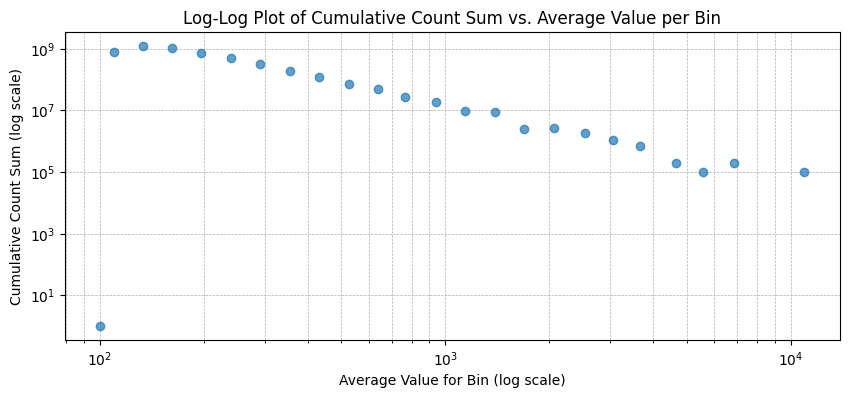

In [21]:
# Plot the log-log graph
plt.figure(figsize=(10, 4))
plt.loglog(bin_summary['Avg_Value'], bin_summary['Cum_Count_Sum'], marker='o', linestyle='None', alpha=0.7)
plt.xlabel('Average Value for Bin (log scale)')
plt.ylabel('Cumulative Count Sum (log scale)')
plt.title('Log-Log Plot of Cumulative Count Sum vs. Average Value per Bin')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

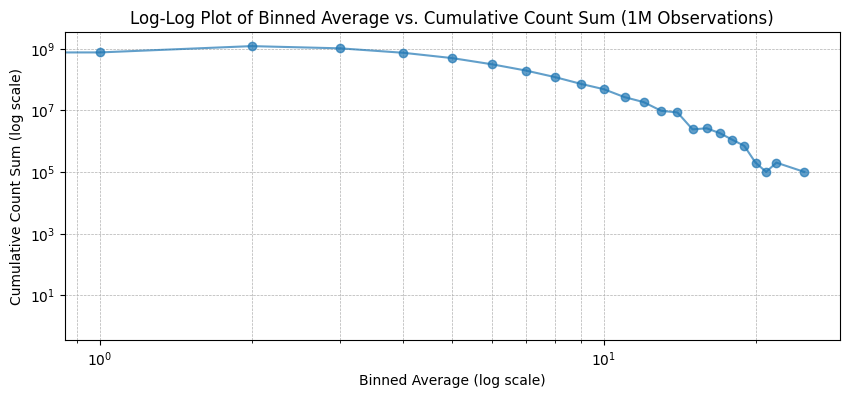

In [22]:
# Plot the log-log graph of Binned Average vs. Cumulative Count Sum
plt.figure(figsize=(10, 4))
plt.loglog(bin_summary['BinLogspace'], bin_summary['Cum_Count_Sum'], marker='o', linestyle='-', alpha=0.7)
plt.xlabel('Binned Average (log scale)')
plt.ylabel('Cumulative Count Sum (log scale)')
plt.title('Log-Log Plot of Binned Average vs. Cumulative Count Sum (1M Observations)')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

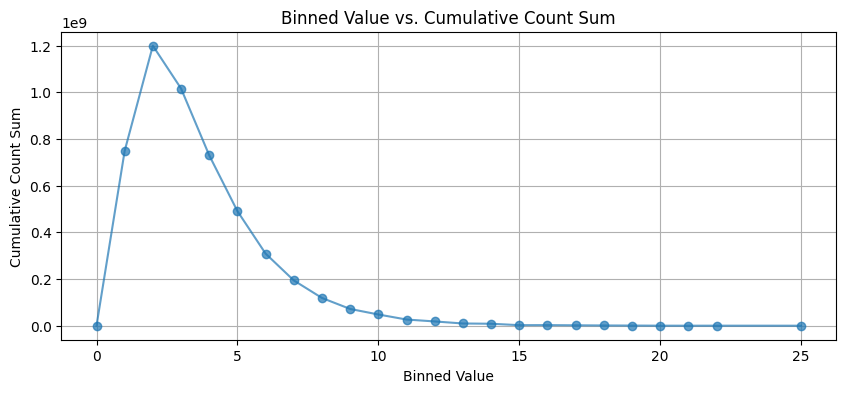

In [23]:
# Plot the graph of Binned Value vs. Cumulative Count Sum
plt.figure(figsize=(10, 4))
plt.plot(bin_summary['BinLogspace'], bin_summary['Cum_Count_Sum'], marker='o', linestyle='-', alpha=0.7)
plt.xlabel('Binned Value')
plt.ylabel('Cumulative Count Sum')
plt.title('Binned Value vs. Cumulative Count Sum')
plt.grid(True)
plt.show()

## using explicit formula

In [24]:
# Group by bins and calculate stats
bin_summary = df.groupby('BinFormula',observed=False).agg(
    Avg_Value=('Value', 'mean'),
    Cum_Count_Sum=('Cumulative_Count', 'sum')
).reset_index()

# Convert bin labels to numerical values for plotting
bin_summary['BinFormula'] = bin_summary['BinFormula'].astype(int)

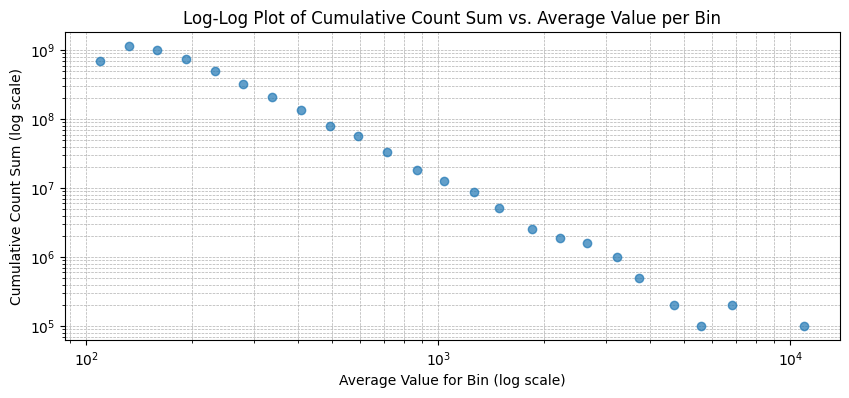

In [25]:
# Plot the log-log graph
plt.figure(figsize=(10, 4))
plt.loglog(bin_summary['Avg_Value'], bin_summary['Cum_Count_Sum'], marker='o', linestyle='None', alpha=0.7)
plt.xlabel('Average Value for Bin (log scale)')
plt.ylabel('Cumulative Count Sum (log scale)')
plt.title('Log-Log Plot of Cumulative Count Sum vs. Average Value per Bin')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

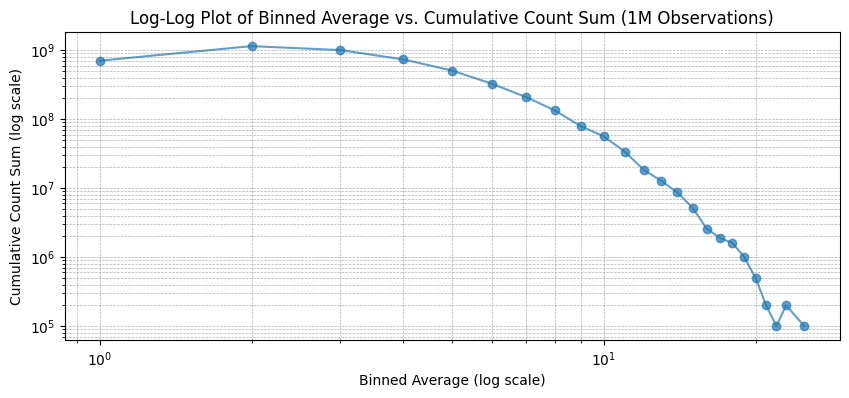

In [26]:
# Plot the log-log graph of Binned Average vs. Cumulative Count Sum
plt.figure(figsize=(10, 4))
plt.loglog(bin_summary['BinFormula'], bin_summary['Cum_Count_Sum'], marker='o', linestyle='-', alpha=0.7)
plt.xlabel('Binned Average (log scale)')
plt.ylabel('Cumulative Count Sum (log scale)')
plt.title('Log-Log Plot of Binned Average vs. Cumulative Count Sum (1M Observations)')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

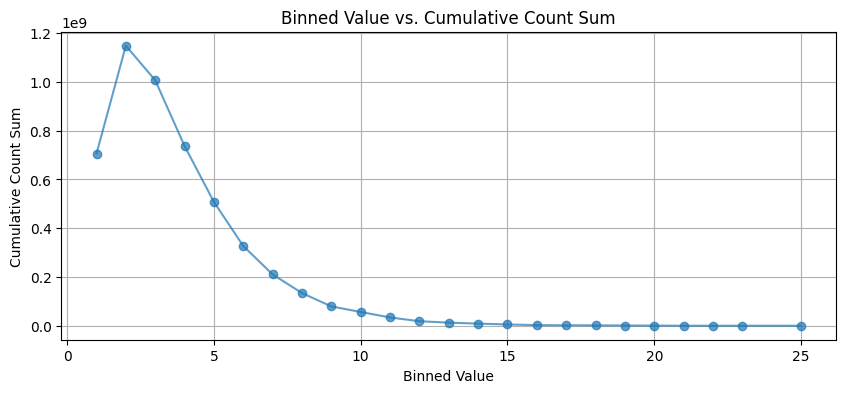

In [27]:
# Plot the graph of Binned Value vs. Cumulative Count Sum
plt.figure(figsize=(10, 4))
plt.plot(bin_summary['BinFormula'], bin_summary['Cum_Count_Sum'], marker='o', linestyle='-', alpha=0.7)
plt.xlabel('Binned Value')
plt.ylabel('Cumulative Count Sum')
plt.title('Binned Value vs. Cumulative Count Sum')
plt.grid(True)
plt.show()

## Using linspace function

In [28]:
# Group by bins and calculate stats
bin_summary = df.groupby('BinLinspace',observed=False).agg(
    Avg_Value=('Value', 'mean'),
    Cum_Count_Sum=('Cumulative_Count', 'sum')
).reset_index()

# Convert bin labels to numerical values for plotting
bin_summary['BinLinspace'] = bin_summary['BinLinspace'].astype(int)

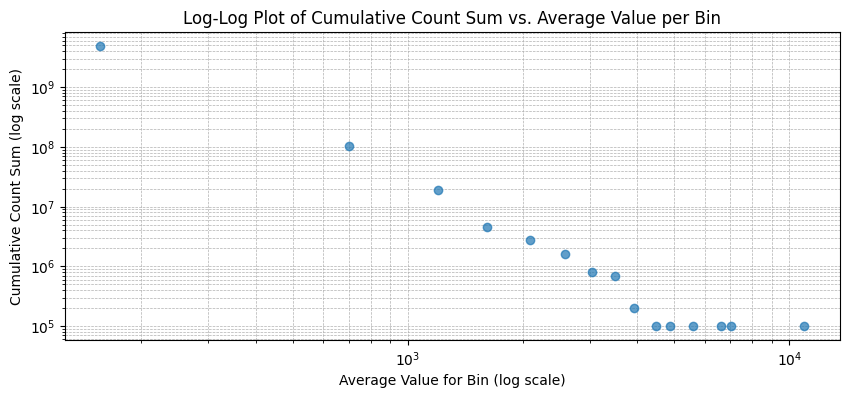

In [29]:
# Plot the log-log graph
plt.figure(figsize=(10, 4))
plt.loglog(bin_summary['Avg_Value'], bin_summary['Cum_Count_Sum'], marker='o', linestyle='None', alpha=0.7)
plt.xlabel('Average Value for Bin (log scale)')
plt.ylabel('Cumulative Count Sum (log scale)')
plt.title('Log-Log Plot of Cumulative Count Sum vs. Average Value per Bin')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

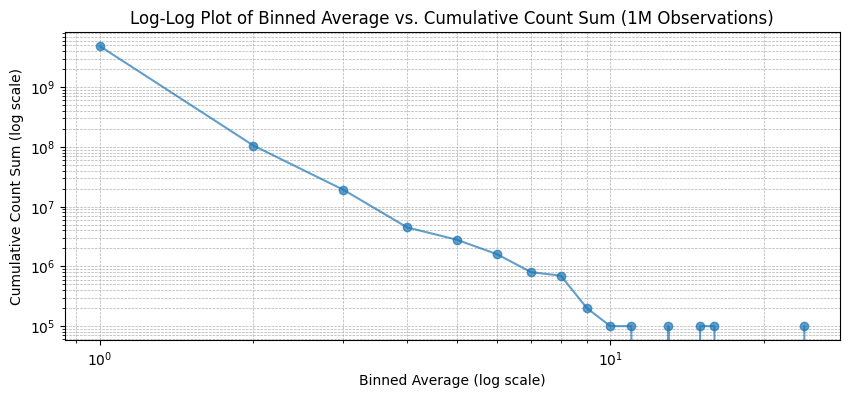

In [30]:
# Plot the log-log graph of Binned Average vs. Cumulative Count Sum
plt.figure(figsize=(10, 4))
plt.loglog(bin_summary['BinLinspace'], bin_summary['Cum_Count_Sum'], marker='o', linestyle='-', alpha=0.7)
plt.xlabel('Binned Average (log scale)')
plt.ylabel('Cumulative Count Sum (log scale)')
plt.title('Log-Log Plot of Binned Average vs. Cumulative Count Sum (1M Observations)')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

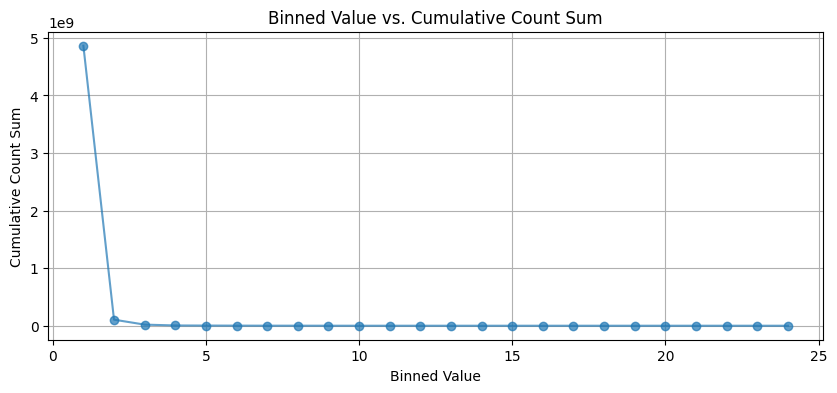

In [31]:
# Plot the graph of Binned Value vs. Cumulative Count Sum
plt.figure(figsize=(10, 4))
plt.plot(bin_summary['BinLinspace'], bin_summary['Cum_Count_Sum'], marker='o', linestyle='-', alpha=0.7)
plt.xlabel('Binned Value')
plt.ylabel('Cumulative Count Sum')
plt.title('Binned Value vs. Cumulative Count Sum')
plt.grid(True)
plt.show()

## Using other binning method

In [32]:
# Group by bins and calculate stats
bin_summary = df.groupby('BinMethod',observed=False).agg(
    Avg_Value=('Value', 'mean'),
    Cum_Count_Sum=('Cumulative_Count', 'sum')
).reset_index()

# Convert bin labels to numerical values for plotting
bin_summary['BinMethod'] = bin_summary['BinMethod'].astype(int)

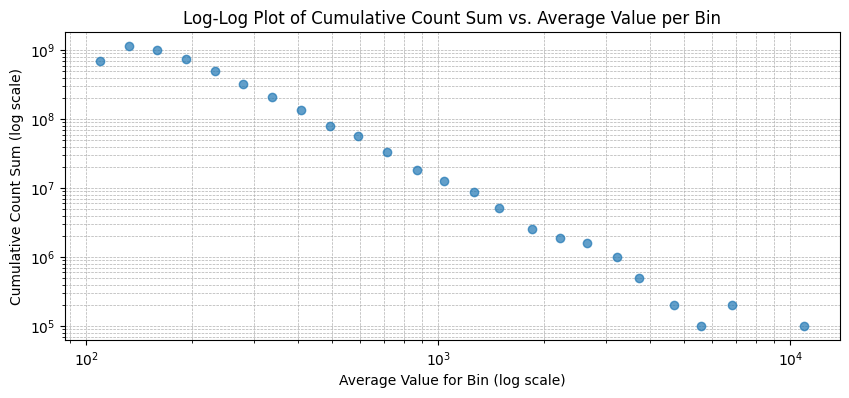

In [33]:
# Plot the log-log graph
plt.figure(figsize=(10, 4))
plt.loglog(bin_summary['Avg_Value'], bin_summary['Cum_Count_Sum'], marker='o', linestyle='None', alpha=0.7)
plt.xlabel('Average Value for Bin (log scale)')
plt.ylabel('Cumulative Count Sum (log scale)')
plt.title('Log-Log Plot of Cumulative Count Sum vs. Average Value per Bin')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

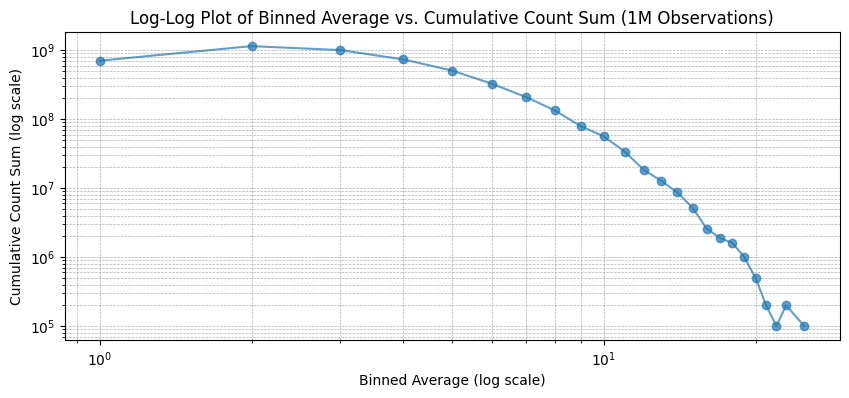

In [34]:
# Plot the log-log graph of Binned Average vs. Cumulative Count Sum
plt.figure(figsize=(10, 4))
plt.loglog(bin_summary['BinMethod'], bin_summary['Cum_Count_Sum'], marker='o', linestyle='-', alpha=0.7)
plt.xlabel('Binned Average (log scale)')
plt.ylabel('Cumulative Count Sum (log scale)')
plt.title('Log-Log Plot of Binned Average vs. Cumulative Count Sum (1M Observations)')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

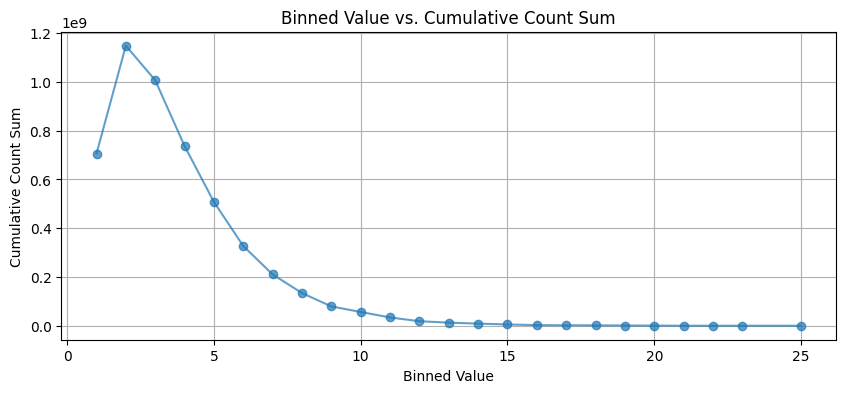

In [35]:
# Plot the graph of Binned Value vs. Cumulative Count Sum
plt.figure(figsize=(10, 4))
plt.plot(bin_summary['BinMethod'], bin_summary['Cum_Count_Sum'], marker='o', linestyle='-', alpha=0.7)
plt.xlabel('Binned Value')
plt.ylabel('Cumulative Count Sum')
plt.title('Binned Value vs. Cumulative Count Sum')
plt.grid(True)
plt.show()

# Analysis of distributions

In [36]:
df.groupby(['BinLogspace'],observed=False).agg(counter = ('BinLogspace','count')).reset_index()

,BinLogspace,counter
0,0,1
1,1,38710
2,2,23720
3,3,14576
4,4,8958
5,5,5533
6,6,3316
7,7,2026
8,8,1220
9,9,730


In [37]:
df.groupby(['BinLinspace'],observed=False).agg(counter = ('BinLinspace','count')).reset_index()

,BinLinspace,counter
0,1,98635
1,2,1061
2,3,192
3,4,45
4,5,28
5,6,16
6,7,8
7,8,7
8,9,2
9,10,1


In [38]:
df.groupby(['BinFormula'],observed=False).agg(counter = ('BinFormula','count')).reset_index()

,BinFormula,counter
0,1,37575
1,2,23323
2,3,14745
3,4,9186
4,5,5787
5,6,3538
6,7,2210
7,8,1380
8,9,808
9,10,571
